In [1]:
# Example of fruits for classification problem

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [3]:
fruit_data = pd.read_table('Datasets/fruit_data_with_colors.txt')
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
look_up_fruit_name = dict(zip(fruit_data.fruit_label.unique(), fruit_data.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Creating train-test split

In [5]:
X = fruit_data[['mass','width','height','color_score']]
y = fruit_data['fruit_label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 4), (15, 4), (44,), (15,))

<IPython.core.display.Javascript object>


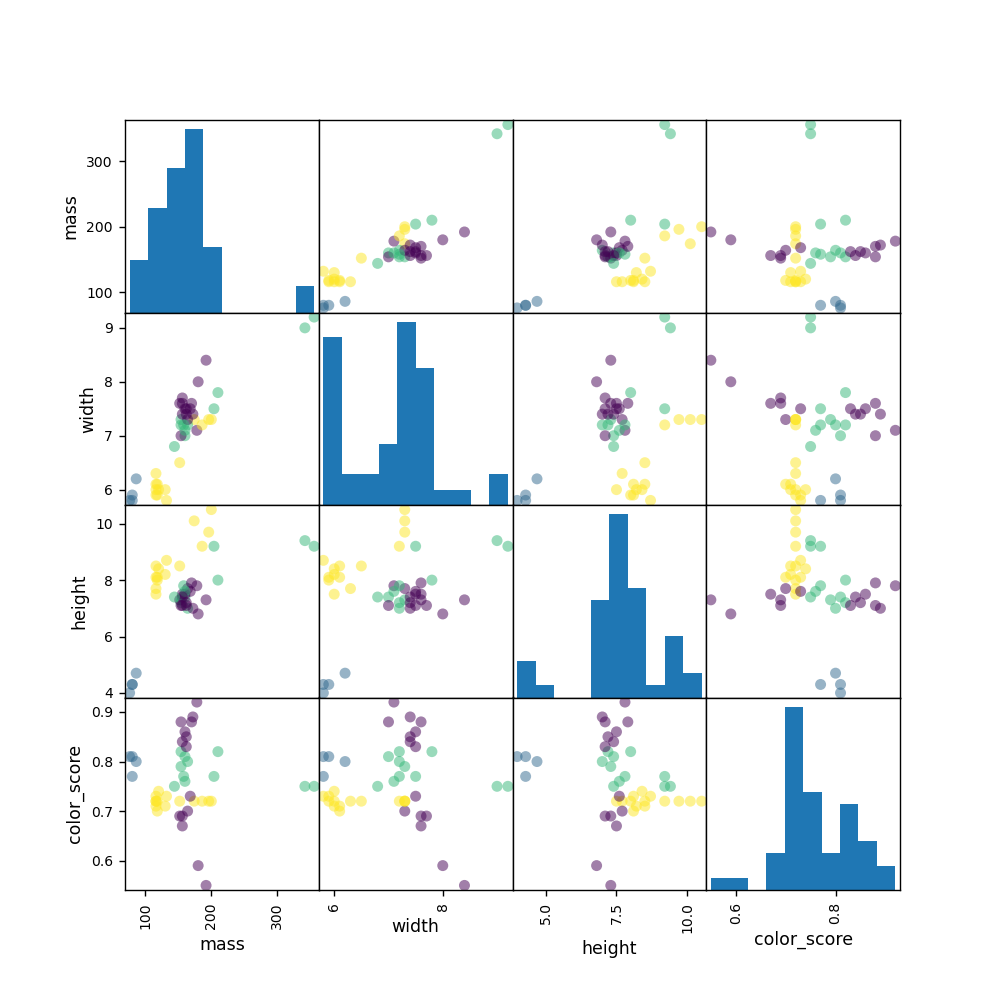

In [8]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker='o', s=40, figsize=(8,8))

In [9]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


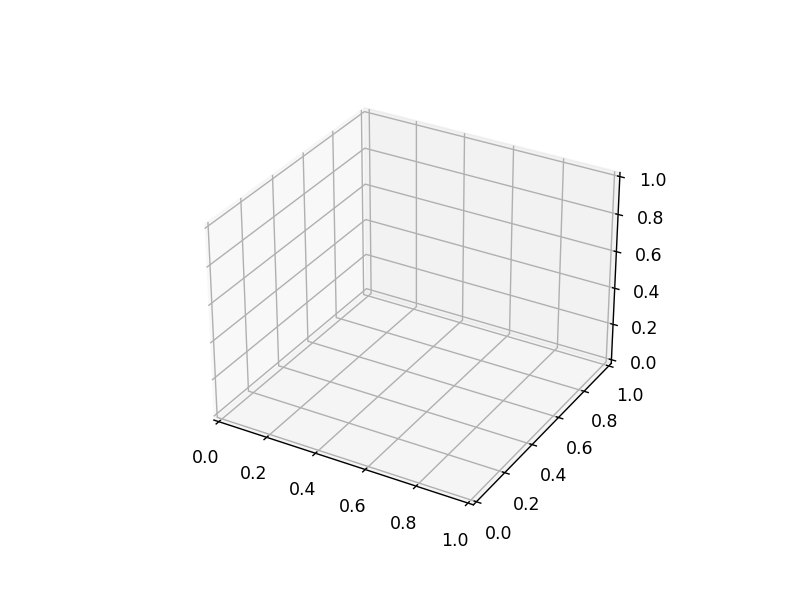

KeyError: 'color_score'

In [20]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

## KNN

In [11]:
X = fruit_data[['mass','width','height']]
y = fruit_data['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

##### Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph

knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test, y_test)

0.5333333333333333

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
fruit_pred = knn.predict([[20,4.3,5.5]])
look_up_fruit_name[fruit_pred[0]]

'mandarin'

In [17]:
fruit_pred = knn.predict([[100,6.3,8.5]])
look_up_fruit_name[fruit_pred[0]]

'lemon'

##### Checking accuracy for various values of k

<IPython.core.display.Javascript object>


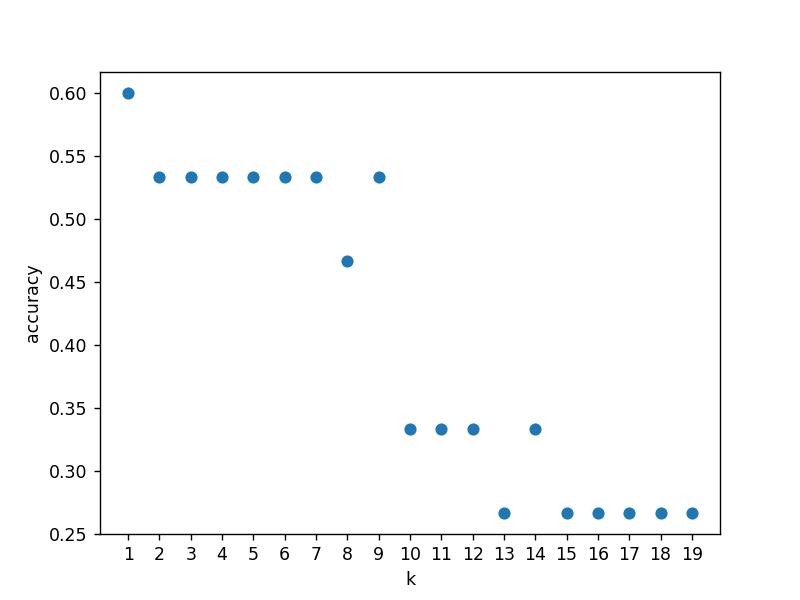

In [18]:
k_range = range(1,20)
scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(k_range)
plt.show()